# Homework 1
### JP Zamanillo

In [1]:
import pandas as pd
import numpy as np

### Q.1.20

##### a. Obtain the estimated regression function.

In [2]:
df = pd.read_table("CH01PR20.txt")
df.columns = "x y".split()
df.head();

In [3]:
def splitter_second(num):
    '''Turns a float object into a string and then returns the second item'''
    num = str(num)
    return num.split()[1]

In [4]:
df["y"] = df["x"].apply(splitter_second)  # applying new function from above
df.head();

In [5]:
df["x"] = df["x"].apply(
    lambda x: str(x.split()[0]))  # removing old values from x col
for col in df.columns:  # turning the values back to floats
    df[col] = df[col].apply(float)

In [6]:
df.rename({"x": "y", "y": "x"}, axis=1, inplace=True)
df.head();

In [7]:
from sklearn import linear_model
lm = linear_model.LinearRegression()

Below, we'll seperate the predictor variable from the response variable as seperate objects.

In [8]:
X = np.array(df["x"]).reshape(
    -1, 1)  # have to reshape the array for sklearn due to SLM
y = np.array(df["y"])

Now we can fit the linear model to the seperated data.

In [35]:
lm.fit(X, y);  # fitting the model to predictor and response

##### b. Plot the estimated regression function and the data.  How well does the estimated regression function fit the data?

In [10]:
import matplotlib.pyplot as plt
import matplotlib.style as style
style.use("fivethirtyeight")
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'Minutes on Phone')

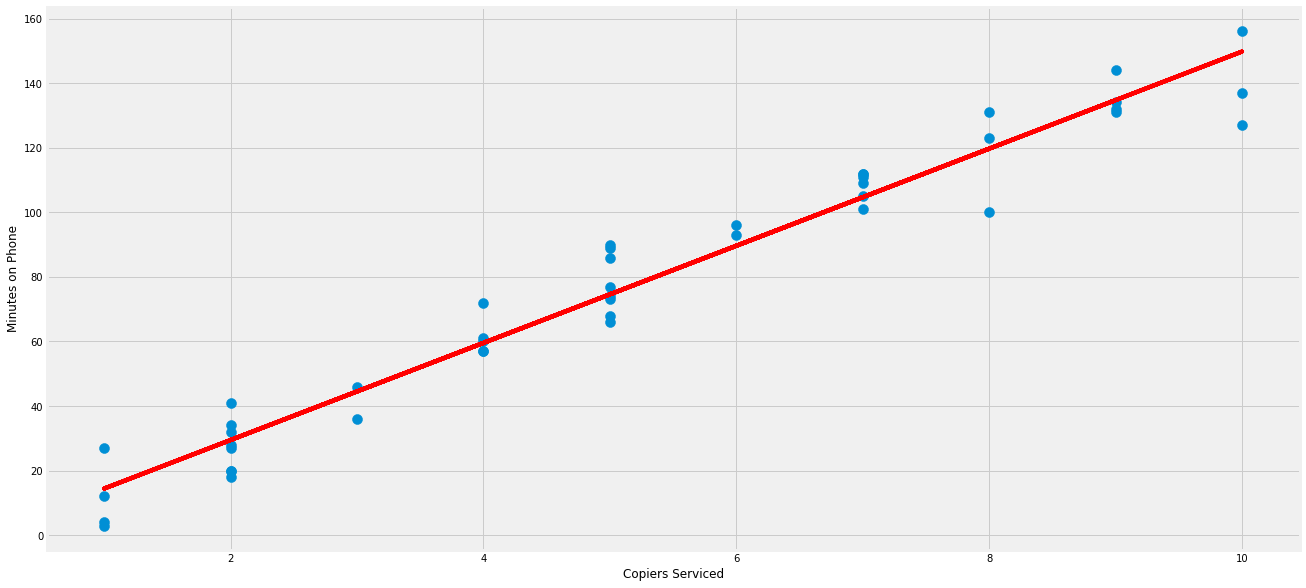

In [11]:
pred = lm.predict(X)  # getting predictions from the model
plt.figure(figsize=(20, 10))
plt.scatter(X, y, s=100)
plt.plot(X, pred, color='red')
plt.xlabel("Copiers Serviced")
plt.ylabel("Minutes on Phone")

At first glance, it appears that the line of best fit generated from the model fitting process represents the relationship between the variables justly.  In other words, if we were to hand draw a line through this scatterplot, out line would likely look very similar to the above plot soley based off intuition.

##### c. Interpret $\beta_0$ in your estimated regression function.  Does $\beta_0$ provide any relevant information here?  Explain.

In [12]:
print(f"Beta Zero: {lm.intercept_}")

Beta Zero: -0.5801566579634425


In this case, $\beta_0$ doesn't make much sense from a contextual standpoint.  What $\beta_0$ tells for this scenario is that a customer service agent will spend about -30 seconds the phone provided that they don't service any copiers.

##### d. Obtain the point estimate of the mean service time when X = 5 copiers are serviced.

In [13]:
lm.predict(np.array(5).reshape(-1,
                               1))  # getting prediction at 5 copiers serviced

array([74.59608355])

The output above suggests that a customer service agent will tend to be on the phone for about 75 minutes if they service 5 copiers.

### Q.1.24

##### b. Obtain point estimates of $\sigma^2$ and $\sigma$.  In what units is $\sigma$ expressed? 

In [14]:
from sklearn.metrics import mean_squared_error

In [15]:
print(
    f"Sigma Squared Estimate: {mean_squared_error(y, pred)}\nSigma Estimate: {np.sqrt(mean_squared_error(y, pred))}"
)

Sigma Squared Estimate: 75.9194894110821
Sigma Estimate: 8.713179064559737


In this case, the sample variance ($\sigma$ estimate) states that the mean absolute error is expressed as almost 9 minutes of error on either side of the regression line for the current model.

### Q.2.5

##### a. Estimate the change in the mean service time when the number of copiers serviced increases by one.  Use a 90 percent confidence interval.  Interpret your confidence interval.

In [16]:
import scipy.stats as st

In [19]:
mse = mean_squared_error(y, pred)
den = sum((np.array(X) - np.mean(X))**2)
s2 = mse / den
s = np.sqrt(s2)

In [20]:
upper = lm.coef_ + st.t.ppf(1 - 0.9 / 2, len(np.array(X) - 2)) * s
lower = lm.coef_ - st.t.ppf(1 - 0.9 / 2, len(np.array(X) - 2)) * s
print(f"Upper: {upper}\nLower: {lower}")
interval_b1 = (lower, upper)

Upper: [15.09492494]
Lower: [14.97557115]


The confidence interval above suggests that due to sampling error, there tends to be anywhere between a 14.98 and 15.09 increase in minutes on the phone for each unit increase in copiers serviced.

##### b. Conduct a $t$ test to determine whether or not there is a linear association between $x$ and $y$; control the risk for $\alpha$ at .10.

We define our hypotheses for the association between $x$ and $y$ as the following:

$H_0: \beta_1 = 0$

$H_a: \beta_1$ $\neq$ $0$

In [21]:
t_crit = lm.coef_ / s
print(f"T-crit: {t_crit}")

T-crit: [31.8388288]


In addition the decision rule is defined as: 

If $t^*(31.84) \leq t(1- \alpha(0.1) / 2; n - 2$, conclude $H_0$

If $t^*(31.84) \geq t(1- \alpha(0.1) / 2; n - 2$, conclude $H_a$

In [22]:
if t_crit <= st.t.ppf(1 - 0.1 / 2, len(np.array(X)) - 2):
    print(
        f"T-crit less than or equal to {st.t.ppf(1 - 0.1 / 2, len(np.array(X)) - 2)}, conclude null hypothesis."
    )
else:
    print(
        f"T-crit({float(t_crit)}) greater than or equal to {st.t.ppf(1 - 0.1 / 2, len(np.array(X)) - 2)}, conclude alternate hypothesis."
    )

T-crit(31.83882879516551) greater than or equal to 1.681070701847763, conclude alternate hypothesis.


##### c. Are your results in parts (a) and (b) consistent?  Explain.

Yes, the results are consistent chiefly due to the confidence interval for the estimate of $\beta_1$ from part (a).  The confidence interval from part (a) suggests that the true value of $\beta_1$ is between 14.98 and 15.09, which shows that the confidence interval does not include 0 (which would suggest no relationship).  Since we used the $s\{b_1\}$ from part (a) to find our t critical value, we can be confident that the results are consistent and lead us to reject the null hypothesis.

##### d. Conduct a test to decide whether the standard of 14 minute phone length increase per copier serviced is being satisified by Tri-City.  Control the risk of Type I error at 0.05.  What is the p-value? 

We define our hypotheses for above the question as follows:

$H_0: \beta_1 \leq 14$

$H_a: \beta_1 > 14$

In addition the decision rule is defined as: 

If $t^*(31.84) \leq t(1- \alpha(0.05) / 2; n - 2$, conclude $H_0$

If $t^*(31.84) > t(1- \alpha(0.05) / 2; n - 2$, conclude $H_a$

In [23]:
if t_crit <= st.t.ppf(1 - 0.05 / 2, len(np.array(X)) - 2):
    print(
        f"T-crit less than or equal to {st.t.ppf(1 - 0.05 / 2, len(np.array(X)) - 2)}, conclude null hypthesis."
    )
else:
    print(
        f"T-crit({float(t_crit)}) greater than or equal to {st.t.ppf(1 - 0.05 / 2, len(np.array(X)) - 2)}, conclude alternate hypthesis."
    )

T-crit(31.83882879516551) greater than or equal to 2.0166921941428133, conclude alternate hypthesis.


In [24]:
test_outcome = st.stats.ttest_1samp(np.array(y), 14)
print(f"P-value: {1 - test_outcome.pvalue / 2}")

P-value: 0.9999999999993248


The results of this one-tailed t-test indicates that there is insufficient evidence to reject the null hypothesis that $\beta_1 \leq 14$.  When changing the $\alpha$ to reduce Type I errors, we expanded our confidence interval for $\beta_1$ to include 14, which would indicate that at our sample size, $\beta_1$ could likely be less than or equal to 14.

### Q.2.14

##### a. Obtain a 90 percent confidence interval for the mean service time on calls in which six copiers are serviced.  Interpret your confidence interval.

In [36]:
y_hat = lm.intercept_ + lm.coef_ * 6

mse = mean_squared_error(y, pred)
den = sum((np.array(y) - np.mean(y))**2)
s2 = mse / den
s = np.sqrt(s2)

upper = y_hat + st.t.ppf(1 - 0.9 / 2, len(np.array(y) - 2)) * s
lower = y_hat - st.t.ppf(1 - 0.9 / 2, len(np.array(y) - 2)) * s
print(f"Upper: {upper}\nLower: {lower}")
interval_yhat = (lower, upper)

Upper: [89.63521546]
Lower: [89.62744773]


The confidence interval suggests that when the confidence level is set to 0.9, the predicted value of minutes on the phone ranges between 89.63 and 89.64 when 6 copiers are serviced.

##### b. Obtain a 90 percent prediction interval for the service time on the next call in which six copiers are serviced.  Is your predition interval wider than the corresponding confidence interval in part (a)?  Should it be?

In [28]:
s2_pred = mse + st.sem(pred)
s_pred = np.sqrt(s2_pred)
upper = y_hat + st.t.ppf(1 - 0.9 / 2, len(np.array(y) - 2)) * s_pred
lower = y_hat - st.t.ppf(1 - 0.9 / 2, len(np.array(y) - 2)) * s_pred
print(f"Upper: {upper}\nLower: {lower}")
interval_yhat = (lower, upper)

Upper: [90.77675755]
Lower: [88.48590563]


The prediction interval is wider than the interval from (a) because the distribution of the prediction bounds exceeds the limits of the of the interval established from part (a).  The bounds should be wider becuase confidence limits for $E\{Y_h\}$ reach the mean of the lower and upper prediction limits, which are assumed to have a normal distribution with half of the distribution falling on the left or right tail of each respective distribution.

### Q.2.24

##### b. Conduct an F test to determine whether or not there is a linear association between time spent and number of copiers serviced; use $\alpha = 0.1$.  State the alternatives, decision rule, and conclusion.

We define our hypotheses for the association between $x$ and $y$ as the following:

$H_0: \beta_1 = 0$

$H_a: \beta_1$ $\neq$ $0$

In [38]:
ssto = sum((np.array(y) - np.mean(y))**2)
sse = sum((np.array(y) - np.array(pred))**2)
ssr = ssto - sse
mse = sse / 43
msr = ssr / 1
f_crit = msr / mse
print(f"F-crit for decision rule: {f_crit}")

F-crit for decision rule: 968.6571959790668


In addition the decision rule is defined as: 

If $F^*(968.66) \leq F(1- \alpha(0.1); n - 2$, conclude $H_0$

If $F^*(968.66) > F(1- \alpha(0.1); n - 2$, conclude $H_a$

In [30]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('y ~ x', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)
model.params

                sum_sq    df           F        PR(>F)
x         76960.422977   1.0  968.657196  4.009032e-31
Residual   3416.377023  43.0         NaN           NaN


Intercept    -0.580157
x            15.035248
dtype: float64

In [31]:
# f_test = st.f_oneway(np.array(X).reshape(-1, 1), np.array(y).reshape(-1, 1))
# print(f_test)

In [32]:
dfn = 1
dfd = len(np.array(X))
if f_crit <= st.f.ppf(1 - 0.1, len(np.array(X)) - 2, dfn, dfd):
    print(
        f"F-crit less than or equal to {st.f.ppf(1 - 0.1, len(np.array(X)) - 2, dfn, dfd)}, conclude null hypthesis."
    )
else:
    print(
        f"F-crit({float(f_crit)}) greater than or equal to {st.f.ppf(1 - 0.1, len(np.array(X)) - 2, dfn, dfd)}, conclude alternate hypthesis."
    )

F-crit(968.6571959790668) greater than or equal to 107.58447008262405, conclude alternate hypthesis.


Based on an F-test, there is sufficient evidence to reject the null hypothesis based on the premise that the F-crit value far exceeds the percent point function value of 107.58.  Additionally, the combination of a high F-crit value and a low p-value(4.009032e-31) provide further support to reject the null hypothesis.

##### c. How much is the total variation in number of minutes spent on a call reduced when the number of copiers serviced is introduced into the analysis?  Is this a relatively small or large reduction?  What is the name of this measure?

In [33]:
r2 = ssr / ssto
print(f"R2 Score: {r2}")

R2 Score: 0.95749548347908


The R2 score above indicates that 95.75% of the total variation in the response variable can be determined by the current regression model.

##### d. Calculate $r$ and attach the appropriate sign.

In [34]:
print(f"R Score (Correlation Coefficient): {np.sqrt(r2)}")

R Score (Correlation Coefficient): 0.9785169817019427


The $r$ score above indicates a high degree of positive correlation between x and y.